In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pd.set_option('display.max_columns', None)

In [9]:
nashville = pd.read_csv('../data/building_permits_applied.csv')

In [11]:
nashville

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,Subdivision Lot,Contact,Permit Type,Permit SubType,IVR Tracking,Purpose,Council District,Lon,Lat,ObjectId,Zip Code,x,y
0,T2022015153,Building Residential - New,Master Permit Application,10510018300,3/7/2022 6:00:00 AM,NaN,255524,2019 8TH AVE S,NASHVILLE,TN,N W CORNER 8TH AVE S & DOUGLAS AVE IN DOUGLAS ...,"SPECTRUM RENOVATIONS, INC",CARN,CAZ03A001,4109600,"Building two bathrooms and a dividing wall, wi...",17,-86.779342,36.132035,1,37204,-9.660232e+06,4.318804e+06
1,T2022015160,Building Residential - New,Single Family Residence,07216027200,3/7/2022 6:00:00 AM,NaN,2500,1509 DUGGER DR,NASHVILLE,TN,LOT 44 DUGGER HGTS,Gill design & Construction,CARN,CAA01R301,4109655,Build from ground up New construction single f...,7,-86.712077,36.193431,2,37206,-9.652744e+06,4.327270e+06
2,T2022014547,Building Use & Occupancy,Master Permit Application,06000004500,3/3/2022 6:00:00 AM,NaN,1,0 DICKERSON PIKE,NASHVILLE,TN,W SIDE DICKERSON PK S OF EWING DR,duane cuthertson,CAUO,CAZ03A001,4106990,Master permit to construct 352 residential apa...,2,-86.773257,36.190269,3,37207,-9.659555e+06,4.326834e+06
3,T2022015384,Building Residential - Rehab,Single Family Residence,00600007700,3/7/2022 6:00:00 AM,NaN,16500,2177 BAKER STATION RD,GOODLETTSVILLE,TN,N. SIDE BAKER STATION RD. E. OF BAKER RD.,Henry & Henry Contractors,CARR,CAA01R301,4110508,"Demolition, drywall repair/installation, cabin...",10,-86.754483,36.375046,4,37072,-9.657465e+06,4.352351e+06
4,T2022015517,Building Residential - Addition,"Accessory Structure, Decks",149070B04300CO,3/8/2022 6:00:00 AM,NaN,14780,1248 CANYON RIDGE CT,ANTIOCH,TN,LOT 213 CANYON RIDGE PH 2,"DANIEL, MARQUINTA R. & MICHAEL A.",CARA,CAA14U015,4110989,TO CONSTRUCT 12’X51’ OPEN DECK OFF REAR OF EXI...,28,-86.649476,36.073100,5,37013,-9.645776e+06,4.310684e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,T2024091777,Building Residential - New,Single Family Residence,072151S00100CO,10/10/2024 5:00:00 AM,NaN,287444,2625 A PENNINGTON AVE,NASHVILLE,TN,UNIT A HOMES AT 2625 A PENNINGTON AVENUE AND 2...,ELLIS REAL ESTATE LLC,CARN,CAA01R301,4597980,to construct a single family residence with 21...,7,-86.730226,36.197474,6011,37216,-9.654765e+06,4.327828e+06
6011,T2024091600,Building Residential - New,"Accessory Structure, Pools - Residential",11713005500,10/10/2024 5:00:00 AM,NaN,50000,4004 B VAILWOOD DR,NASHVILLE,TN,LOT 6 WALLACE SUB PT 3,"Music City Pool Builders, LLC",CARN,CAA14U017,4597675,We are building a 15'X24' gunite swimming pool...,34,-86.830438,36.104228,6012,37215,-9.665920e+06,4.314972e+06
6012,T2024091778,Building Residential - New,Single Family Residence,072151S00200CO,10/10/2024 5:00:00 AM,NaN,287444,2625 B PENNINGTON AVE,NASHVILLE,TN,UNIT B HOMES AT 2625 A PENNINGTON AVENUE AND 2...,ELLIS REAL ESTATE LLC,CARN,CAA01R301,4597981,to construct a single family residence with 21...,7,-86.730226,36.197474,6013,37216,-9.654765e+06,4.327828e+06
6013,T2024091784,Building Residential - Addition,"Accessory Structure, Decks",08306034900,10/10/2024 5:00:00 AM,NaN,125000,1704 EASTLAND AVE,NASHVILLE,TN,LOT 1 W.L. HORNS SPOUT SPRING ADDITIONV RESUB ...,IN 1 ACCORD PAINTING & REMODEL LLCA,CARA,CAA14U015,4597986,Addding a screened in porch in the back and so...,6,-86.739331,36.182490,6014,37206,-9.655778e+06,4.325761e+06


In [15]:
nashville.columns = [x.lower() for x in nashville.columns]

In [17]:
# I want to narrow this down even more to specific neighborhoods for each zip code

# define a function to assign neighborhoods based on the zip
def assign_neighborhood(zip_code):
    if str(zip_code).startswith(('37221')):
        return 'Bellevue'
    elif str(zip_code).startswith(('37013')):
        return 'Antioch'
    elif str(zip_code).startswith(('37212')):
        return 'West End'
    elif str(zip_code).startswith(('37203')):
        return 'The Gulch'
    elif str(zip_code).startswith(('37206')):
        return 'East Nashville'
    elif str(zip_code).startswith(('37211')):
        return 'Nolensville'
    elif str(zip_code).startswith(('37115')):
        return 'Madison'
    elif str(zip_code).startswith(('37208')):
        return 'Germantown'
    elif str(zip_code).startswith(('37209')):
        return 'West Nashville'
    elif str(zip_code).startswith(('37218')):
        return 'Bordeaux'
    elif str(zip_code).startswith(('37080')):
        return 'Joelton'
    elif str(zip_code).startswith(('37138')):
        return 'Old Hickory'
    elif str(zip_code).startswith(('37210')):
        return 'Napier'
    elif str(zip_code).startswith(('37228')):
        return 'Metro Center'
    elif str(zip_code).startswith(('37207')):
        return 'McFerrin Park'
    elif str(zip_code).startswith(('37214')):
        return 'Donelson'
    elif str(zip_code).startswith(('37204')):
        return '12 South'
    elif str(zip_code).startswith(('37205')):
        return 'Belle Meade'
    elif str(zip_code).startswith(('37072')):
        return 'Goodlettsville'
    elif str(zip_code).startswith(('37216')):
        return 'East Nashville'
    elif str(zip_code).startswith(('37217')):
        return 'Antioch'
    elif str(zip_code).startswith(('37189')):
        return 'Whites Creek'
    elif str(zip_code).startswith(('37201')):
        return 'Downtown'
    elif str(zip_code).startswith(('37076')):
        return 'Hermitage'
    elif str(zip_code).startswith(('37215')):
        return 'Green Hills'
    elif str(zip_code).startswith(('37027')):
        return 'Brentwood'
    elif str(zip_code).startswith(('37220')):
        return 'Crieve Hall'
    elif str(zip_code).startswith(('37122')):
        return 'Mount Juliet'
    elif str(zip_code).startswith(('37135')):
        return 'Nolensville'
    elif str(zip_code).startswith(('37219')):
        return 'Downtown'
    elif str(zip_code).startswith(('37143')):
        return 'Pegram'
    elif str(zip_code).startswith(('37213')):
        return 'East Bank'
    elif str(zip_code).startswith(('37015')):
        return 'Ashland City'
    elif str(zip_code).startswith(('37086')):
        return 'La Vergne'
    elif str(zip_code).startswith(('37232')):
        return 'Vanderbilt'
    elif str(zip_code).startswith(('37240')):
        return 'Vanderbilt'
    elif str(zip_code).startswith(('37238')):
        return 'Downtown'
    elif str(zip_code).startswith(('37064')):
        return 'Leipers Fork'
    elif str(zip_code).startswith(('37246')):
        return 'Downtown'
    else:
        return 'Other'

nashville['Neighborhood'] = nashville['zip code'].apply(assign_neighborhood)

In [21]:
# create a dictionary to change abbreviations to descriptions.
permit_type_description = {
    'CACA': 'Building Commercial - Addition',
    'CACF': 'Building Commercial - Foundation',
    'CACG': 'Building Commercial - Structural Frame',
    'CACH': 'Building Commercial - shell',
    'CACJ': 'Building Commercial - Fire Damage',
    'CACK': 'Building Commercial - Roofing/Siding',
    'CACL': 'Building Commercial - Rehab Storm Damage',
    'CACN': 'Building Commercial - New',
    'CACR': 'Building Commercial - Rehab',
    'CACS': 'Building Commercial - New Storm Damage',
    'CACT': 'Building Commercial - Tenant Finish Out',
    'CARA': 'Building Residential - Addition',
    'CARE': 'Building Residential - Amend Permit',
    'CARF': 'Building Residential - Foundation',
    'CARH': 'Building Residential - Shell',
    'CARJ': 'Building Residential - Fire Damage',
    'CARK': 'Building Residential - Roofing/Siding',
    'CARL': 'Building Residential - Rehab Storm Damage',
    'CARN': 'Building Residential - New',
    'CARR': 'Building Residential - Rehab',
    'CART': 'Building Residential - Tenant Finish Out',
    'CADM': 'Building Residential - Building Demolition Permit',
    'CADS': 'Building Demolition Storm Damage'
}

# eeplace the abbreviated permit types.
nashville['permit type description'] = nashville['permit type'].replace(permit_type_description)

In [23]:
nashville

,permit #,permit type description,permit subtype description,parcel,date entered,date issued,construction cost,address,city,state,subdivision lot,contact,permit type,permit subtype,ivr tracking,purpose,council district,lon,lat,objectid,zip code,x,y,Neighborhood
0,T2022015153,Building Residential - New,Master Permit Application,10510018300,3/7/2022 6:00:00 AM,NaN,255524,2019 8TH AVE S,NASHVILLE,TN,N W CORNER 8TH AVE S & DOUGLAS AVE IN DOUGLAS ...,"SPECTRUM RENOVATIONS, INC",CARN,CAZ03A001,4109600,"Building two bathrooms and a dividing wall, wi...",17,-86.779342,36.132035,1,37204,-9.660232e+06,4.318804e+06,12 South
1,T2022015160,Building Residential - New,Single Family Residence,07216027200,3/7/2022 6:00:00 AM,NaN,2500,1509 DUGGER DR,NASHVILLE,TN,LOT 44 DUGGER HGTS,Gill design & Construction,CARN,CAA01R301,4109655,Build from ground up New construction single f...,7,-86.712077,36.193431,2,37206,-9.652744e+06,4.327270e+06,East Nashville
2,T2022014547,CAUO,Master Permit Application,06000004500,3/3/2022 6:00:00 AM,NaN,1,0 DICKERSON PIKE,NASHVILLE,TN,W SIDE DICKERSON PK S OF EWING DR,duane cuthertson,CAUO,CAZ03A001,4106990,Master permit to construct 352 residential apa...,2,-86.773257,36.190269,3,37207,-9.659555e+06,4.326834e+06,McFerrin Park
3,T2022015384,Building Residential - Rehab,Single Family Residence,00600007700,3/7/2022 6:00:00 AM,NaN,16500,2177 BAKER STATION RD,GOODLETTSVILLE,TN,N. SIDE BAKER STATION RD. E. OF BAKER RD.,Henry & Henry Contractors,CARR,CAA01R301,4110508,"Demolition, drywall repair/installation, cabin...",10,-86.754483,36.375046,4,37072,-9.657465e+06,4.352351e+06,Goodlettsville
4,T2022015517,Building Residential - Addition,"Accessory Structure, Decks",149070B04300CO,3/8/2022 6:00:00 AM,NaN,14780,1248 CANYON RIDGE CT,ANTIOCH,TN,LOT 213 CANYON RIDGE PH 2,"DANIEL, MARQUINTA R. & MICHAEL A.",CARA,CAA14U015,4110989,TO CONSTRUCT 12’X51’ OPEN DECK OFF REAR OF EXI...,28,-86.649476,36.073100,5,37013,-9.645776e+06,4.310684e+06,Antioch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,T2024091777,Building Residential - New,Single Family Residence,072151S00100CO,10/10/2024 5:00:00 AM,NaN,287444,2625 A PENNINGTON AVE,NASHVILLE,TN,UNIT A HOMES AT 2625 A PENNINGTON AVENUE AND 2...,ELLIS REAL ESTATE LLC,CARN,CAA01R301,4597980,to construct a single family residence with 21...,7,-86.730226,36.197474,6011,37216,-9.654765e+06,4.327828e+06,East Nashville
6011,T2024091600,Building Residential - New,"Accessory Structure, Pools - Residential",11713005500,10/10/2024 5:00:00 AM,NaN,50000,4004 B VAILWOOD DR,NASHVILLE,TN,LOT 6 WALLACE SUB PT 3,"Music City Pool Builders, LLC",CARN,CAA14U017,4597675,We are building a 15'X24' gunite swimming pool...,34,-86.830438,36.104228,6012,37215,-9.665920e+06,4.314972e+06,Green Hills
6012,T2024091778,Building Residential - New,Single Family Residence,072151S00200CO,10/10/2024 5:00:00 AM,NaN,287444,2625 B PENNINGTON AVE,NASHVILLE,TN,UNIT B HOMES AT 2625 A PENNINGTON AVENUE AND 2...,ELLIS REAL ESTATE LLC,CARN,CAA01R301,4597981,to construct a single family residence with 21...,7,-86.730226,36.197474,6013,37216,-9.654765e+06,4.327828e+06,East Nashville
6013,T2024091784,Building Residential - Addition,"Accessory Structure, Decks",08306034900,10/10/2024 5:00:00 AM,NaN,125000,1704 EASTLAND AVE,NASHVILLE,TN,LOT 1 W.L. HORNS SPOUT SPRING ADDITIONV RESUB ...,IN 1 ACCORD PAINTING & REMODEL LLCA,CARA,CAA14U015,4597986,Addding a screened in porch in the back and so...,6,-86.739331,36.182490,6014,37206,-9.655778e+06,4.325761e+06,East Nashville


In [25]:
# made a new column based on building type description
nashville['building type'] = np.where(
    nashville['permit type description'].str.contains('Residential', case=False), 'Residential',
    np.where(nashville['permit type description'].str.contains('Commercial', case=False), 'Commercial', 'Other')
)

# this shows the amount of commercial vs. residental building permits
building_type_count = nashville['building type'].value_counts()
building_type_count

building type
Residential    4235
Commercial     1276
Other           504
Name: count, dtype: int64

In [27]:
# restaurant section

nashville['restaurant'] = nashville['permit subtype description'].str.contains('restaurant', case = False, na = False).astype(int)

#got the total amount of restaurants
restaurant_count = nashville['restaurant'].sum()
restaurant_count

172

In [29]:
# single family homes section

nashville['house'] = nashville['permit subtype description'].str.contains('house|single family residence|residence', case = False, na = False).astype(int)

#got the total amount of houses
house_count = nashville['house'].sum()
house_count

2052

In [31]:
# multifamily houses section
nashville['multifamily'] = nashville['permit subtype description'].str.contains('multifamily|duplex|triplex|apartments|apt|townhome|twnhome', case=False, na=False).astype(int)

#got the total amount of multifamily
multifamily_count = nashville['multifamily'].sum()
multifamily_count

1178

In [33]:
# residential section
nashville['residential'] = nashville['building type'].str.contains('residential', case=False, na=False).astype(int)

#got the total amount of residential builds
residential_count = nashville['residential'].sum()
residential_count

4235

In [35]:
# commercial section
nashville['commercial'] = nashville['building type'].str.contains('commercial', case=False, na=False).astype(int)

#got the total amount of commercial builds
commercial_count = nashville['commercial'].sum()
commercial_count

1276

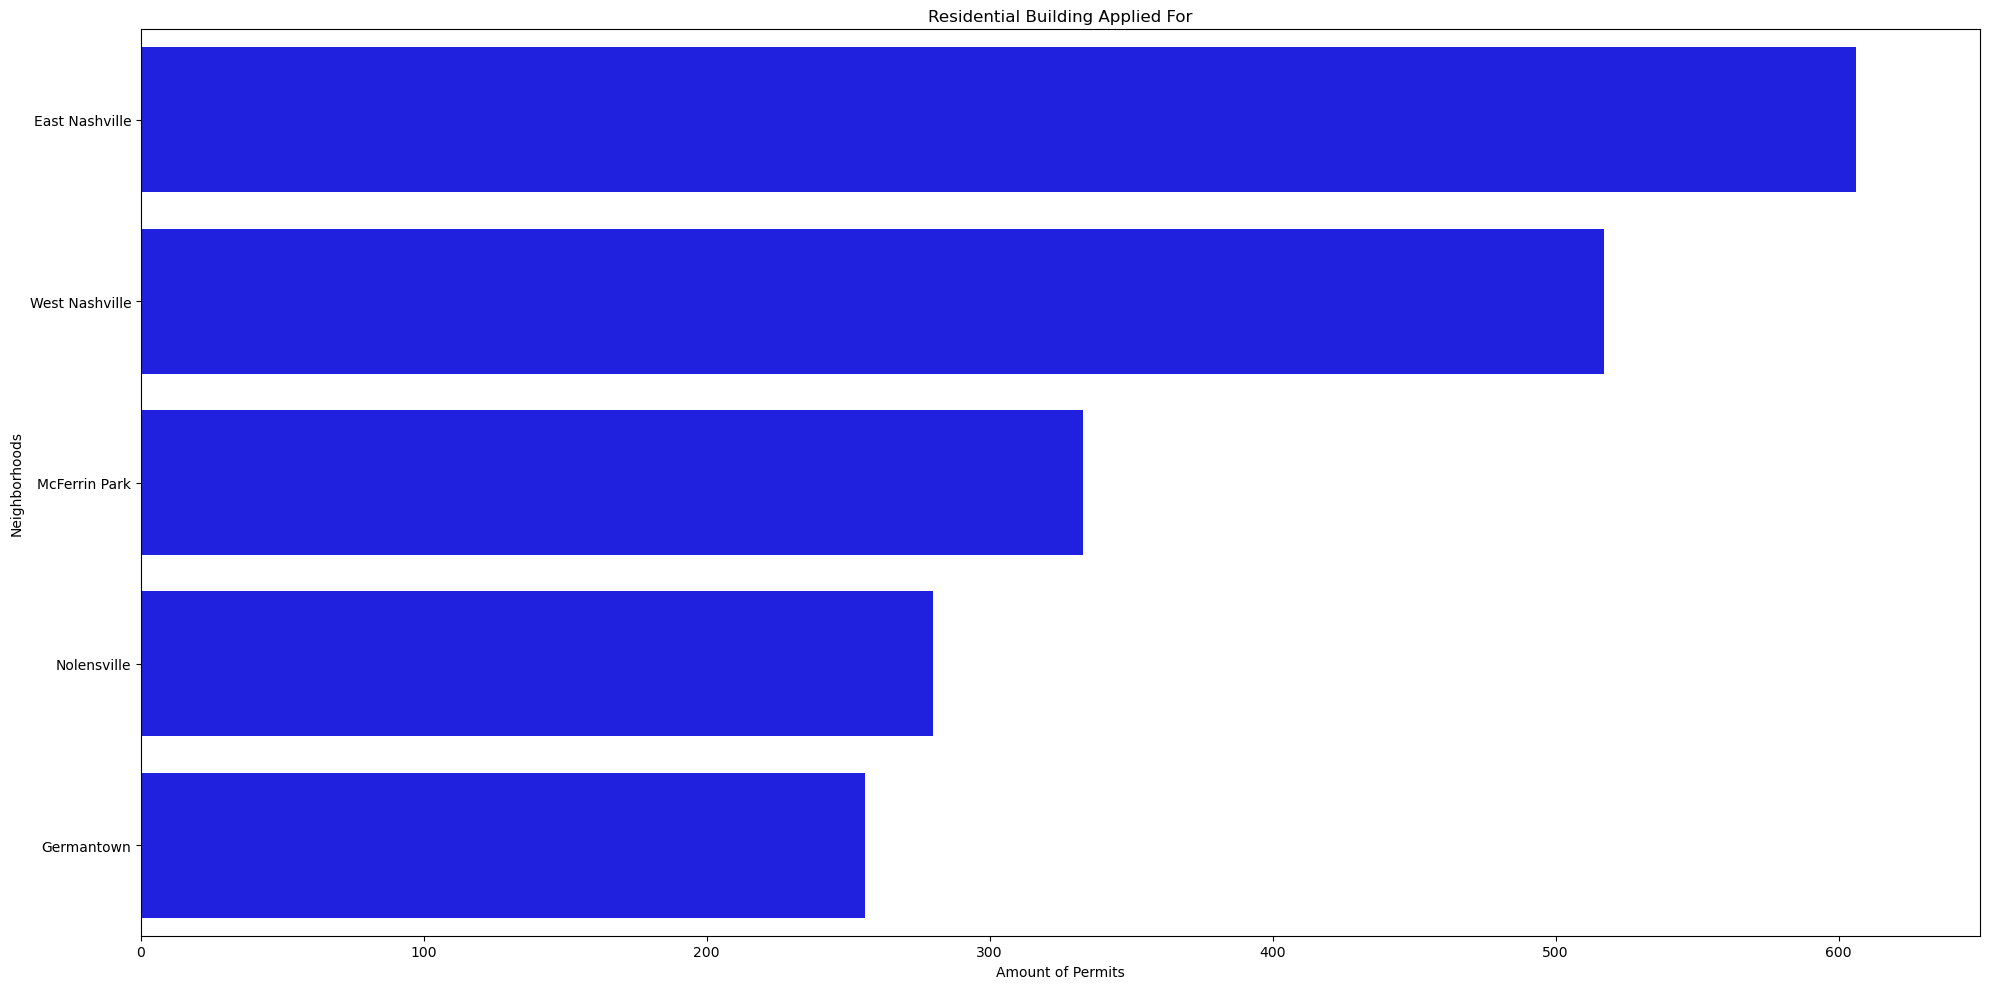

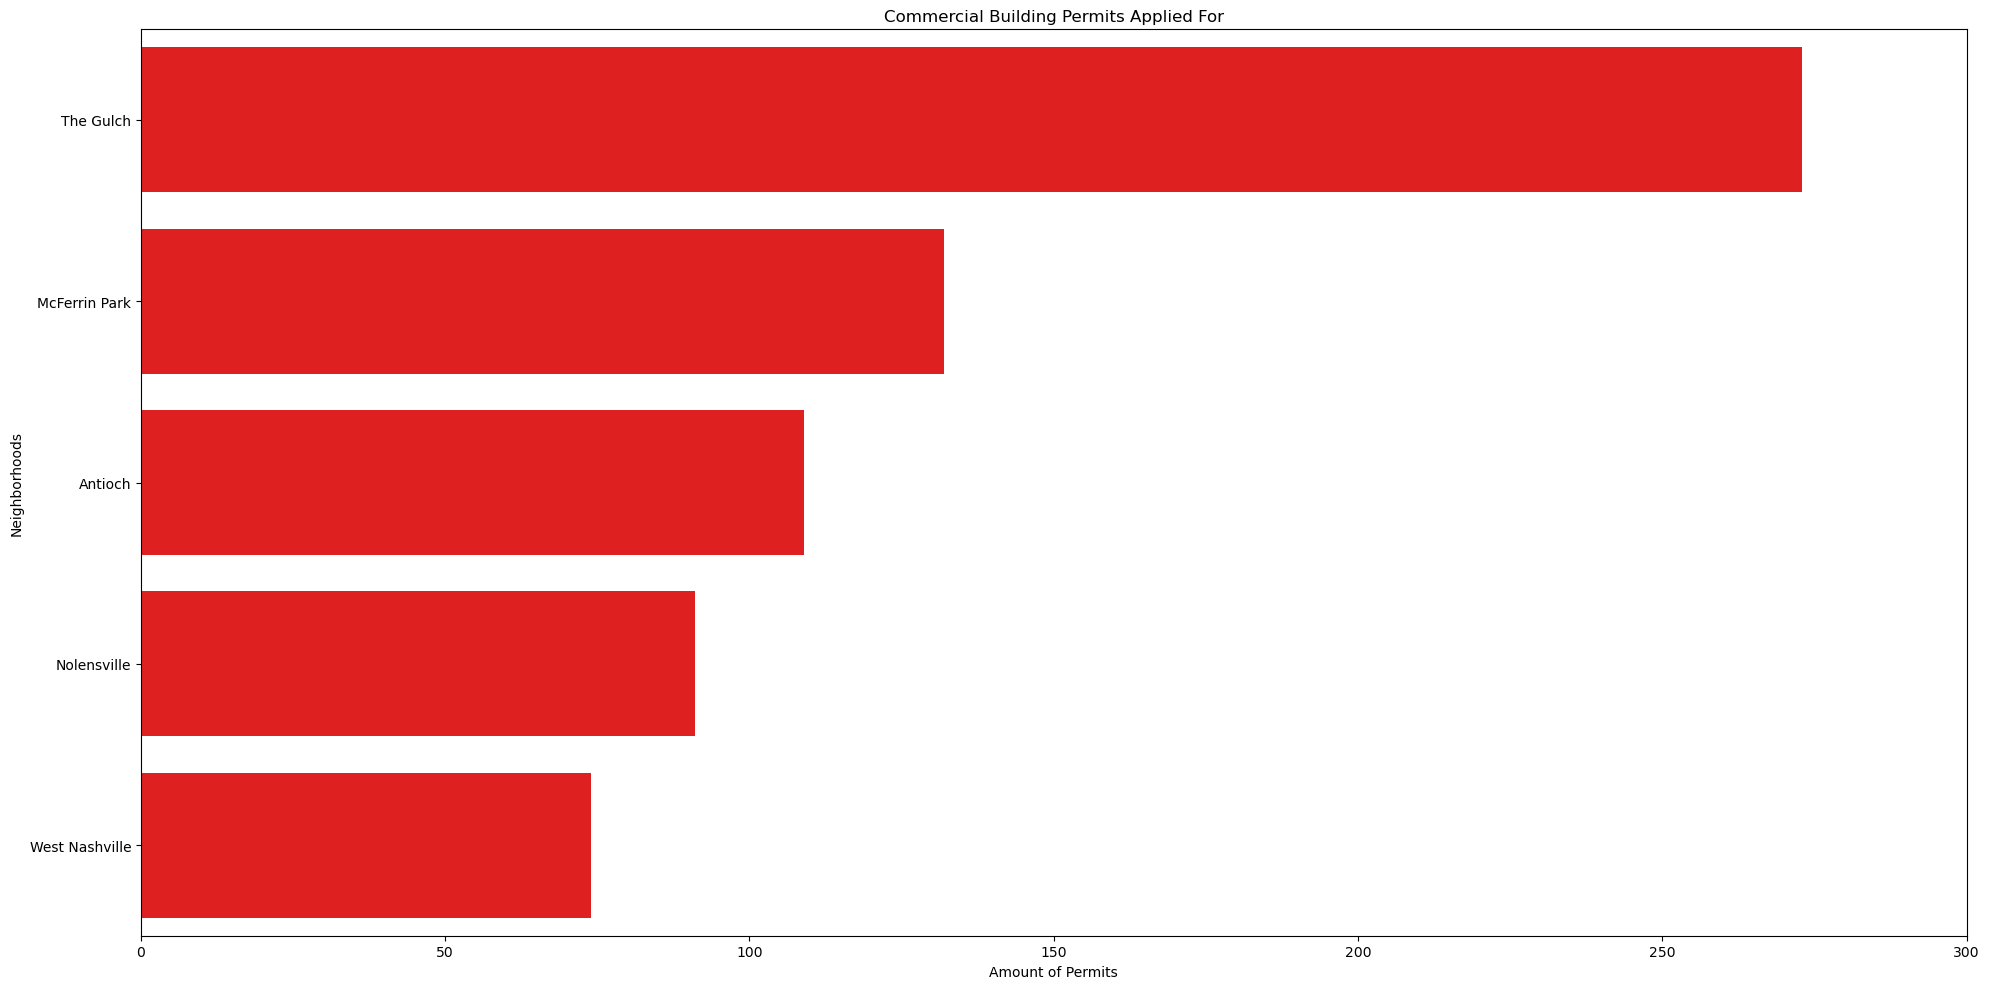

In [53]:
#make  graphs here showing the sum of top 10 residential build and commercial build neighborhoods. Slide 10 in canva.
#this is from the permits issued data
building_count = nashville.groupby(['Neighborhood', 'building type']).size().reset_index(name='count')
building_count = building_count[building_count['building type'] != 'Other']
residential_data = building_count[building_count['building type'] == 'Residential']
commercial_data = building_count[building_count['building type'] == 'Commercial']
residential_sum = residential_data.groupby('Neighborhood')['count'].sum().reset_index()
commercial_sum = commercial_data.groupby('Neighborhood')['count'].sum().reset_index()
top_residential = residential_sum.nlargest(5, 'count')
top_commercial = commercial_sum.nlargest(5, 'count')
plt.figure(figsize=(20, 10))
sns.barplot(x='count', y='Neighborhood', data=top_residential, color='blue')
plt.xlim(0, top_residential['count'].max() * 1.5)
plt.xlim(0, 650)
plt.title('Residential Building Applied For')
plt.xlabel('Amount of Permits')
plt.ylabel('Neighborhoods')
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 10))
sns.barplot(x='count', y='Neighborhood', data=top_commercial, color='red')
plt.xlim(0, top_commercial['count'].max() * 1.5)
plt.xlim(0, 300)
plt.title('Commercial Building Permits Applied For')
plt.xlabel('Amount of Permits')
plt.ylabel('Neighborhoods')
plt.tight_layout()
plt.show()

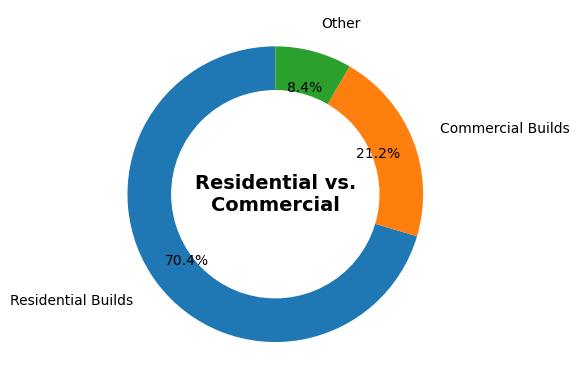

In [59]:
residential_commercial_other = [4235, 1276, 504]
labels = ['Residential Builds', 'Commercial Builds', 'Other']

plt.pie(residential_commercial_other, labels=labels, autopct='%1.1f%%', startangle=90, 
        labeldistance=1.2, pctdistance=0.75)

my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.text(0, 0, 'Residential vs.\nCommercial', horizontalalignment='center', 
         verticalalignment='center', fontsize=14, weight='bold')

plt.show()